In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
# matplotlib.rcParams['font.family'] = 'AppleGothic'#'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
import seaborn as sb

import missingno as msno

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# BASE_DIR = '/content/drive/MyDrive/Kaggle/sat'

In [79]:
# BASE_DIR = 'C:/Users/TFG5076XG/Desktop/Kaggle/sat'
BASE_DIR = '/Users/zzyy/bigdt/Kaggle'

train_path = os.path.join(BASE_DIR, 'data', 'train.csv')
test_path = os.path.join(BASE_DIR, 'data', 'test.csv')

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

label = train['Cover_Type']

# EDA

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826224 entries, 0 to 826223
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  826224 non-null  int64  
 1   Elevation                           826224 non-null  int64  
 2   Aspect                              826224 non-null  int64  
 3   Slope                               826224 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    817992 non-null  float64
 5   Vertical_Distance_To_Hydrology      793164 non-null  float64
 6   Horizontal_Distance_To_Roadways     793085 non-null  float64
 7   Hillshade_9am                       784779 non-null  float64
 8   Hillshade_Noon                      793109 non-null  float64
 9   Hillshade_3pm                       784866 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  793303 non-null  float64
 11  Soil_Type                 

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550816 entries, 0 to 550815
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  550816 non-null  int64  
 1   Elevation                           550816 non-null  int64  
 2   Aspect                              550816 non-null  int64  
 3   Slope                               550816 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    545278 non-null  float64
 5   Vertical_Distance_To_Hydrology      528795 non-null  float64
 6   Horizontal_Distance_To_Roadways     528874 non-null  float64
 7   Hillshade_9am                       523409 non-null  float64
 8   Hillshade_Noon                      528850 non-null  float64
 9   Hillshade_3pm                       523322 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  528656 non-null  float64
 11  Soil_Type                 

In [42]:
train_x = train.drop(columns=['id','Cover_Type'], errors='ignore')
test = test.drop(columns=['id'], errors='ignore')

In [15]:
# 범주형, 숫자형 column 지정
cat_col = list(train_x.columns[10:])
num_col = list(train_x.columns[:10])
cat_col, num_col

(['Soil_Type', 'Wilderness_Area'],
 ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points'])

In [16]:
train_x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2983,339,23,97.0,NaN,1441.0,223.0,205.0,105.0,3487.0,21,0
1,3046,375,5,69.0,-3.0,865.0,223.0,225.0,149.0,1522.0,0,2
2,2540,199,10,128.0,2.0,1009.0,216.0,245.0,146.0,1977.0,0,0
3,2893,351,21,54.0,19.0,4886.0,247.0,195.0,127.0,1777.0,18,2
4,2529,58,35,92.0,42.0,455.0,225.0,249.0,168.0,264.0,25,2


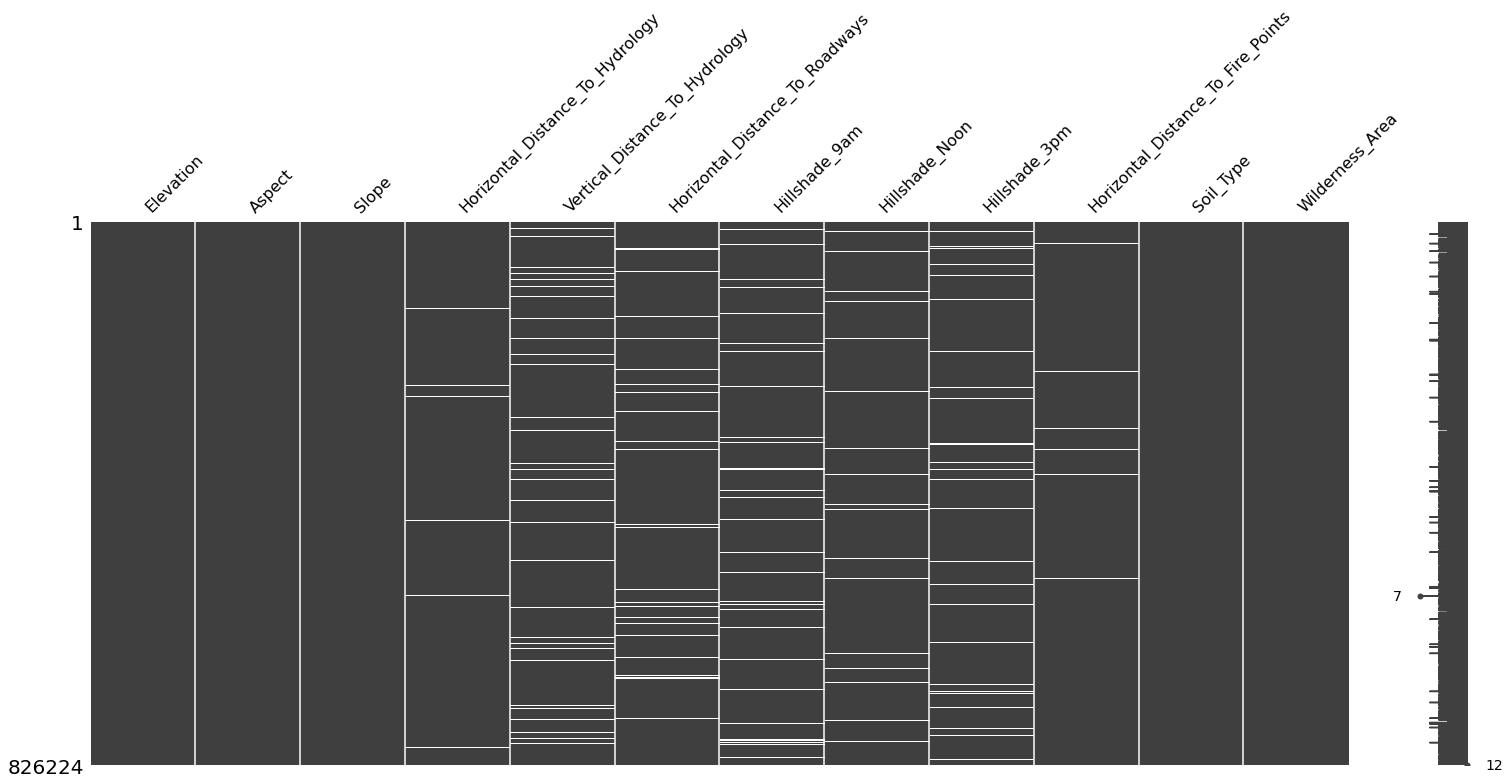

In [17]:
msno.matrix(train_x);

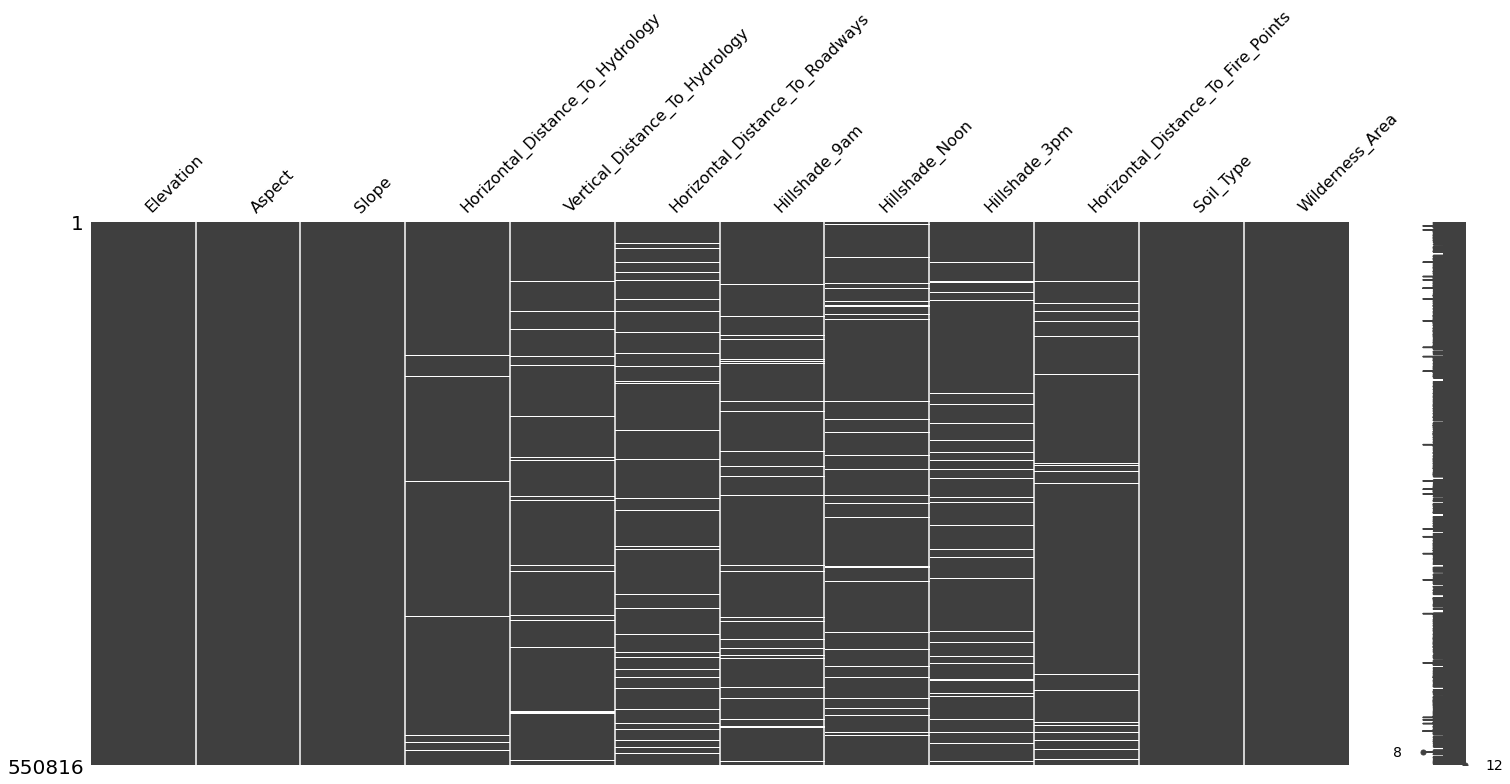

In [18]:
msno.matrix(test);

In [19]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826224 entries, 0 to 826223
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           826224 non-null  int64  
 1   Aspect                              826224 non-null  int64  
 2   Slope                               826224 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    817992 non-null  float64
 4   Vertical_Distance_To_Hydrology      793164 non-null  float64
 5   Horizontal_Distance_To_Roadways     793085 non-null  float64
 6   Hillshade_9am                       784779 non-null  float64
 7   Hillshade_Noon                      793109 non-null  float64
 8   Hillshade_3pm                       784866 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  793303 non-null  float64
 10  Soil_Type                           826224 non-null  int64  
 11  Wilderness_Area           

In [20]:
train_x.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
count,826224.000000,826224.000000,826224.000000,817992.000000,793164.000000,793085.000000,784779.000000,793109.000000,784866.000000,793303.000000,826224.000000,826224.000000
mean,2943.346507,151.517130,15.260949,272.227882,52.673064,1706.496011,211.868308,220.940612,140.612038,1516.416838,10.367157,1.456131
std,328.216211,109.858219,8.588512,226.315705,68.186882,1286.145727,30.701996,22.277715,43.710597,1110.210430,12.770907,0.961180
min,1784.000000,-31.000000,-3.000000,-75.000000,-296.000000,-287.000000,4.000000,56.000000,-51.000000,-267.000000,0.000000,0.000000
25%,2702.000000,60.000000,9.000000,111.000000,4.000000,792.000000,198.000000,210.000000,115.000000,735.000000,0.000000,0.000000
50%,2932.000000,123.000000,14.000000,214.000000,33.000000,1381.000000,218.000000,224.000000,142.000000,1278.000000,3.000000,2.000000
75%,3216.000000,247.000000,20.000000,363.000000,80.000000,2268.000000,233.000000,237.000000,169.000000,1999.000000,21.000000,2.000000
max,4322.000000,405.000000,63.000000,1575.000000,628.000000,7666.000000,291.000000,279.000000,271.000000,8006.000000,39.000000,3.000000


In [ ]:
n_train = train_x.index.size
n_train

826224

In [44]:
for c in train_x.columns:
    print(c, train_x[c][train_x[c].apply(lambda x: x<0)].count()/n_train*100)#plot(kind='box')

Elevation 0.0
Aspect 1.0579455450337922
Slope 0.19050523828889018
Horizontal_Distance_To_Hydrology 0.06838339239721915
Vertical_Distance_To_Hydrology 13.047188171730669
Horizontal_Distance_To_Roadways 0.7664991576134317
Hillshade_9am 0.0
Hillshade_Noon 0.0
Hillshade_3pm 0.3316291949882841
Horizontal_Distance_To_Fire_Points 0.6650738782702996
Soil_Type 0.0
Wilderness_Area 0.0


In [52]:
train_x[train_x<0].dropna(how='all').index.size/n_train*100

15.731327097736205

In [ ]:
n_test = test.index.size
n_test

550816

In [25]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
count,550816.000000,550816.000000,550816.000000,545278.000000,528795.000000,528874.000000,523409.000000,528850.000000,523322.000000,528656.000000,550816.000000,550816.000000
mean,2944.109567,151.443852,15.234367,271.967545,52.843837,1707.654027,211.895139,221.013397,140.671464,1518.082280,10.376699,1.454143
std,328.006946,109.707668,8.586205,226.309936,68.395071,1287.935400,30.698694,22.276175,43.655699,1114.598851,12.776968,0.961824
min,1773.000000,-32.000000,-3.000000,-92.000000,-282.000000,-255.000000,-2.000000,50.000000,-49.000000,-270.000000,0.000000,0.000000
25%,2703.000000,61.000000,9.000000,111.000000,4.000000,793.000000,198.000000,210.000000,115.000000,735.000000,0.000000,0.000000
50%,2933.000000,123.000000,14.000000,214.000000,33.000000,1381.000000,218.000000,224.000000,142.000000,1277.000000,3.000000,2.000000
75%,3216.000000,246.000000,20.000000,362.000000,80.000000,2269.000000,233.000000,237.000000,169.000000,1999.000000,21.000000,2.000000
max,4355.000000,402.000000,61.000000,1592.000000,628.000000,7586.000000,297.000000,269.000000,272.000000,7989.000000,39.000000,3.000000


In [54]:
for c in num_col:
    print(c, test[c][test[c].apply(lambda x: x<0)].count()/n_test*100)

Elevation 0.0
Aspect 1.0567957357810958
Slope 0.19643583338174636
Horizontal_Distance_To_Hydrology 0.0708040434555278
Vertical_Distance_To_Hydrology 13.090033695462733
Horizontal_Distance_To_Roadways 0.7792075756695521
Hillshade_9am 0.0001815488293731482
Hillshade_Noon 0.0
Hillshade_3pm 0.3462136176145936
Horizontal_Distance_To_Fire_Points 0.6851652820542613


In [55]:
test[test<0].dropna(how='all').index.size/n_test*100

15.82052808923488

In [74]:
train_x.isna().sum()

Elevation                                 0
Aspect                                 8741
Slope                                  1574
Horizontal_Distance_To_Hydrology       8797
Horizontal_Distance_To_Roadways       39472
Hillshade_9am                         41445
Hillshade_Noon                        33115
Hillshade_3pm                         44098
Horizontal_Distance_To_Fire_Points    38416
Soil_Type                                 0
Wilderness_Area                           0
dtype: int64

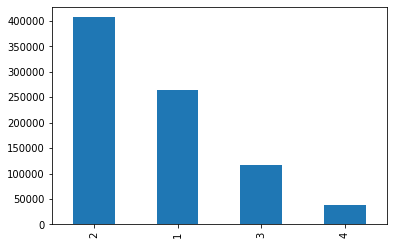

In [83]:
label.value_counts().plot(kind='bar');

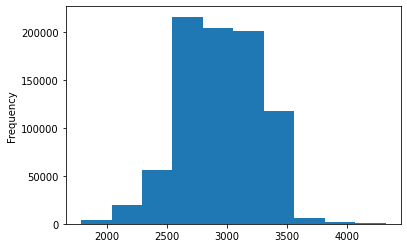

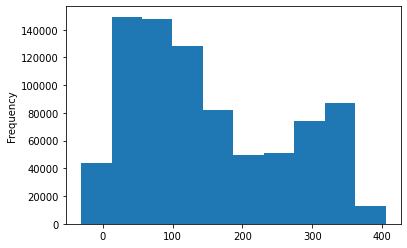

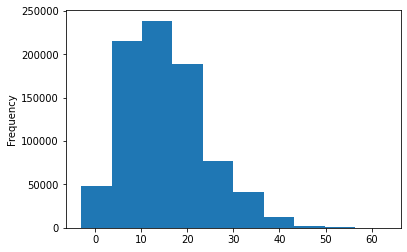

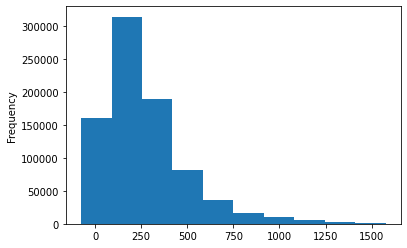

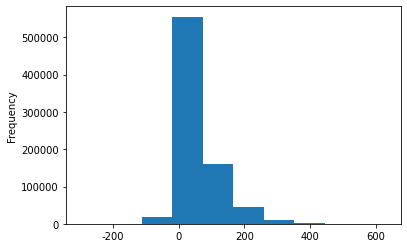

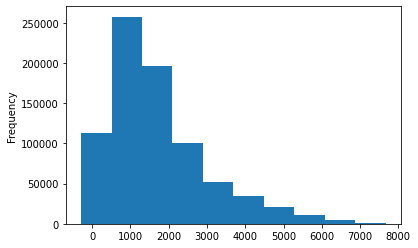

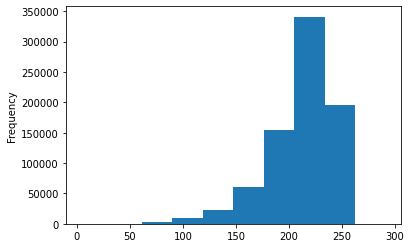

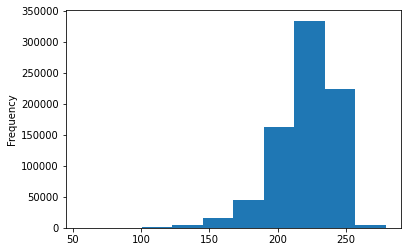

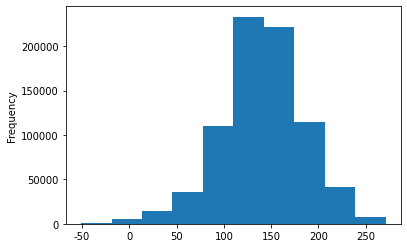

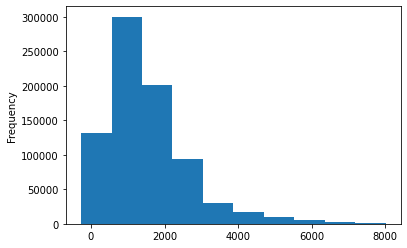

In [33]:
# num_col 분포
for col in num_col:
    plt.figure()
    train_x[col].plot(kind='hist', xlabel=col)
    plt.show()


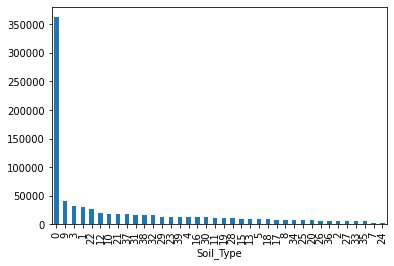

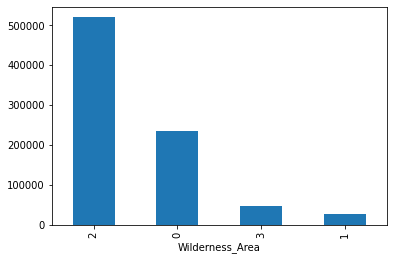

In [20]:
# cat_col 분포
for col in cat_col:
    plt.figure()
    train_x[col].value_counts().plot(kind='bar', xlabel=col)
    plt.show()

# preprocessing

In [21]:
# for i in enumerate (cat_col) : 
#     ca = i[1] 
#     train_x[ca] = train_x[ca].astype('category') 
#     test[ca] = test[ca].astype('category')

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import * # MinMaxScaler, StandardScaler, OneHotEncoder

def preprocess(trn, val, test):
    tmp_train = trn.copy()
    tmp_valid = val.copy()
    tmp_test  = test.copy()

    # null num columns -> mean
    imputer = SimpleImputer(strategy='mean')
    tmp_train[num_col] = imputer.fit_transform(tmp_train[num_col])
    tmp_valid[num_col] = imputer.transform(tmp_valid[num_col])
    tmp_test[num_col] = imputer.transform(tmp_test[num_col])

    # # scaling
    scaler = MinMaxScaler()
    tmp_train[num_col] = scaler.fit_transform(tmp_train[num_col])
    tmp_valid[num_col] = scaler.transform(tmp_valid[num_col])
    tmp_test[num_col] = scaler.transform(tmp_test[num_col])
    
    # encoding
    x_catcol_all = pd.concat([tmp_train[cat_col], tmp_valid[cat_col], tmp_test[cat_col]])
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(x_catcol_all)
    
    ohe_col = []
    for fni, cat in zip(ohe.feature_names_in_, ohe.categories_):
        ohe_col += [fni + '_'+ i for i in cat.astype(str)]
    
    new_train_cat = pd.DataFrame(ohe.transform(tmp_train[cat_col]), columns=ohe_col, index=tmp_train.index)
    new_valid_cat = pd.DataFrame(ohe.transform(tmp_valid[cat_col]), columns=ohe_col, index=tmp_valid.index)
    new_test_cat = pd.DataFrame(ohe.transform(tmp_test[cat_col]), columns=ohe_col, index=tmp_test.index)
    
    ## drop cat_col
    for data in [tmp_train, tmp_valid, tmp_test]:
        data.drop(columns=cat_col, inplace=True, errors='ignore')
    
    tmp_train = pd.concat([tmp_train, new_train_cat], axis=1)
    tmp_valid = pd.concat([tmp_valid, new_valid_cat], axis=1)
    tmp_test = pd.concat([tmp_test, new_test_cat], axis=1)
        
    return tmp_train, tmp_valid, tmp_test

# model selection

In [108]:
from sklearn.model_selection import *

from sklearn.tree import DecisionTreeClassifier
# RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from lightgbm import LGBMClassifier, early_stopping

In [90]:
# split data
x_train, x_valid, y_train, y_valid = train_test_split(train_x, label,
                                                      test_size=0.3,
                                                      random_state=23,
                                                      shuffle=True,
                                                      stratify=label
                                                     )
# preprocessing
x_train, x_valid, x_test = preprocess(x_train, x_valid, test)

# scorer
scorer = make_scorer(f1_score, average='weighted')

def get_grid(model, init_pm, fit_pm):
    
    grid = GridSearchCV(model, 
                        verbose=10,
                        param_grid=init_pm,
                        cv=5,
                        scoring=scorer
                       )
    grid.fit(x_train, y_train,
             **fit_pm
            )
    return grid, grid.best_estimator_



# ensemble

In [91]:

def get_oof(estm, fit_pm):
    n_splits = 5

    # oof values array
    le = LabelEncoder()
    le.fit(label)
    oof_pred = np.zeros((test.shape[0], len(le.classes_)))
    
    # StratifiedKFold object
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    # val scores
    val_scores = list()
    # f1 scores array [train, valid]
    score_recode = list()
    
    # n_splits 만큼 반복
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_x, label)):
        # train, valid split
        x_train, y_train = train_x.iloc[trn_idx,:], label.iloc[trn_idx,]
        x_valid, y_valid = train_x.iloc[val_idx,:], label.iloc[val_idx,]    

        # preprocessing
        x_train, x_valid, x_test = preprocess(x_train, x_valid, test)


        # fitting
        estm.fit(x_train, y_train,
                 # sample_weight=y_train.map(weights),
                  **fit_pm
                 )

        # log_loss check
        trn_logloss = log_loss(y_train, estm.predict_proba(x_train))
        val_logloss = log_loss(y_valid, estm.predict_proba(x_valid))
        print('{} Fold, train logloss : {:.4f}4, validation logloss : {:.4f}'.format(i, trn_logloss, val_logloss))
        
        # 로그값 저장
        val_scores.append(val_logloss)

        # predict probability
        oof_pred += estm.predict_proba(x_test) / n_splits

        # train, valid scores 값 확인
        train_pred = np.argmax(estm.predict_proba(x_train), axis=1)+1
        valid_pred = np.argmax(estm.predict_proba(x_valid), axis=1)+1
        train_scr = f1_score(y_train, train_pred,average='weighted')
        valid_scr = f1_score(y_valid, valid_pred,average='weighted')
        score_recode.append([train_scr, valid_scr])

    print('Cross Validation Score: {:.4f}'.format(np.mean(val_scores)))
    
    return oof_pred, val_scores, score_recode


In [32]:
# parameters 
callback = early_stopping(stopping_rounds=500)

init_params = {
    'objective':['multiclass'],
    'learning_rate':[0.05],
    'n_estimators': [5000],
    'max_depth': [10], 
    'min_data_in_leaf': [1000], # minimal number of data in one leaf
    'num_leaves': [201],
    'lambda_l1':[50],
    # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
    'n_jobs':[4],
    'random_state': [43]
}

fit_params = {
    'callbacks':[callback],
    'eval_metric':['logloss'],
    'eval_set':[(x_valid, y_valid)]
}


# grid, b_estm = get_grid(init_params, fit_params)

oof, loss, score = get_oof(LGBMClassifier(**init_params), fit_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START lambda_l1=50, learning_rate=0.05, max_depth=10, min_data_in_leaf=1000, n_estimators=5000, n_jobs=4, num_leaves=201, objective=multiclass, random_state=43
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[456]	valid_0's multi_logloss: 0.156014
[CV 1/5; 1/1] END lambda_l1=50, learning_rate=0.05, max_depth=10, min_data_in_leaf=1000, n_estimators=5000, n_jobs=4, num_leaves=201, objective=multiclass, random_state=43;, score=0.930 total time=  32.5s
[CV 2/5; 1/1] START lambda_l1=50, learning_rate=0.05, max_depth=10, min_data_in_leaf=1000, n_estimators=5000, n_jobs=4, num_leaves=201, objective=multiclass, random_state=43
[LightGBM] [Warning] min

In [33]:
grid, b_estm, b_estm.best_score_, oof, loss, score

(GridSearchCV(cv=5, estimator=LGBMClassifier(),
              param_grid={'lambda_l1': [50], 'learning_rate': [0.05],
                          'max_depth': [10], 'min_data_in_leaf': [1000],
                          'n_estimators': [5000], 'n_jobs': [4],
                          'num_leaves': [201], 'objective': ['multiclass'],
                          'random_state': [43]},
              scoring=make_scorer(f1_score, average=weighted), verbose=10),
 LGBMClassifier(lambda_l1=50, learning_rate=0.05, max_depth=10,
                min_data_in_leaf=1000, n_estimators=5000, n_jobs=4,
                num_leaves=201, objective='multiclass', random_state=43),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('multi_logloss',
                            0.14632144092673854)])}),
 array([[9.89651874e-01, 9.91829389e-03, 3.77327167e-05, 3.92099573e-04],
        [1.16160086e-04, 2.61301705e-02, 9.73706243e-01, 4.74265642e-05],
        [4.21166434e-02, 1.27609287e-03, 

In [31]:
grid, b_estm, b_estm.best_score_, oof, loss, score

(GridSearchCV(cv=5, estimator=LGBMClassifier(),
              param_grid={'lambda_l1': [100], 'learning_rate': [0.05],
                          'max_depth': [10], 'min_data_in_leaf': [5000],
                          'n_estimators': [10000], 'n_jobs': [4],
                          'num_leaves': [101], 'objective': ['multiclass'],
                          'random_state': [43]},
              scoring=make_scorer(f1_score, average=weighted), verbose=10),
 LGBMClassifier(lambda_l1=100, learning_rate=0.05, max_depth=10,
                min_data_in_leaf=5000, n_estimators=10000, n_jobs=4,
                num_leaves=101, objective='multiclass', random_state=43),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('multi_logloss',
                            0.1636227680435095)])}),
 array([[9.78171148e-01, 2.09155412e-02, 1.31369400e-04, 7.81941225e-04],
        [2.09268557e-04, 2.91650506e-02, 9.70532307e-01, 9.33735090e-05],
        [4.87322517e-02, 2.04393001e-0

# model run

In [ ]:
model = LGBMClassifier()


# parameters 
callback = early_stopping(stopping_rounds=500)

# values should be list form
init_params = {
    'objective':['multiclass'],
    'learning_rate':[0.05],
    'n_estimators': [5000],
    'max_depth': [10, 15, 20], 
    'min_data_in_leaf': [100, 500], # minimal number of data in one leaf
    'num_leaves': [81, 101, 131],
    'lambda_l1':[50],
    # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
    'n_jobs':[4],
    'random_state': [43]
}

fit_params = {
    'callbacks':[callback],
    'eval_metric':['logloss'],
    'eval_set':[(x_valid, y_valid)]
}


grid, b_estm = get_grid(init_params, fit_params)

oof, loss, score = get_oof(b_estm, fit_params)

In [29]:
# parameters 
callback = early_stopping(stopping_rounds=500)

# init_params = {
#     'objective':['multiclass'],
#     'learning_rate':[0.05],
#     'n_estimators': [5000],
#     'max_depth': [10], 
#     'min_data_in_leaf': [1000], # minimal number of data in one leaf
#     'num_leaves': [81],
#     'lambda_l1':[50],
#     # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
#     'n_jobs':[4],
#     'random_state': [43]
# }

init_params = {
    'objective':'multiclass',
    'learning_rate':0.05,
    'n_estimators': 5000,
    'max_depth': 10,
    'min_data_in_leaf': 1000, # minimal number of data in one leaf
    'num_leaves': 51,
    'lambda_l1':50,
    'num_class':4,
    # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
    'n_jobs':4,
    'random_state':43
}

fit_params = {
    'callbacks':[callback],
    'eval_metric':['logloss'],
    'eval_set':[(x_valid, y_valid)]
}


# grid, b_estm = get_grid(init_params, fit_params)

oof, loss, score = get_oof(LGBMClassifier(**init_params), fit_params)

[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[552]	valid_0's multi_logloss: 0.151019
0 Fold, train logloss : 0.14584, validation logloss : 0.1546
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
Early stopping, best iteration is:
[578]	valid_0's multi_logloss: 0.146746
1 Fold, train logloss : 0.14604, validation logloss : 0.1532
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value

In [30]:
# grid, b_estm, b_estm.best_score_, 
oof, loss, score

(array([[9.89200879e-01, 1.03326112e-02, 4.15342003e-05, 4.24975213e-04],
        [1.09990732e-04, 2.39159802e-02, 9.75928012e-01, 4.60171467e-05],
        [4.01175555e-02, 1.38109266e-03, 4.22393654e-05, 9.58459112e-01],
        ...,
        [1.02675696e-04, 9.99337582e-01, 4.82867852e-04, 7.68745625e-05],
        [2.35895768e-04, 9.99550482e-01, 1.61767606e-04, 5.18547481e-05],
        [1.13942523e-02, 9.88441857e-01, 1.84499087e-05, 1.45441060e-04]]),
 [0.1546207971125334,
  0.15324790047421363,
  0.15369530132122614,
  0.1540954784884517,
  0.1530081074019602],
 [[0.9351974182390224, 0.9302838197573791],
  [0.9349632421033951, 0.9311212822155354],
  [0.9352490456937509, 0.9302711589535688],
  [0.9352222888722052, 0.9302113060741568],
  [0.9349315106816865, 0.9308896365840881]])

In [31]:
# parameters 
callback = early_stopping(stopping_rounds=500)

# init_params = {
#     'objective':['multiclass'],
#     'learning_rate':[0.05],
#     'n_estimators': [5000],
#     'max_depth': [10], 
#     'min_data_in_leaf': [1000], # minimal number of data in one leaf
#     'num_leaves': [81],
#     'lambda_l1':[50],
#     # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
#     'n_jobs':[4],
#     'random_state': [43]
# }

init_params = {
    'objective':'multiclass',
    'learning_rate':0.05,
    'n_estimators': 5000,
    'max_depth': -1,
    'min_data_in_leaf': 800, # minimal number of data in one leaf
    'num_leaves': 51,
    'lambda_l1':50,
    'num_class':4,
    # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
    'n_jobs':4,
    'random_state':43
}

fit_params = {
    'callbacks':[callback],
    'eval_metric':['logloss'],
    'eval_set':[(x_valid, y_valid)]
}


# grid, b_estm = get_grid(init_params, fit_params)

oof, loss, score = get_oof(LGBMClassifier(**init_params), fit_params)

[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[1094]	valid_0's multi_logloss: 0.150607
0 Fold, train logloss : 0.14534, validation logloss : 0.1545
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
Early stopping, best iteration is:
[1021]	valid_0's multi_logloss: 0.146643
1 Fold, train logloss : 0.14584, validation logloss : 0.1534
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: la

In [32]:
# grid, b_estm, b_estm.best_score_, 
oof, loss, score

(array([[9.89314268e-01, 1.02081683e-02, 4.03729054e-05, 4.37190654e-04],
        [1.34289854e-04, 2.37753089e-02, 9.76030642e-01, 5.97593562e-05],
        [3.40361321e-02, 8.97216855e-04, 3.20802178e-05, 9.65034571e-01],
        ...,
        [1.19377422e-04, 9.99265023e-01, 5.42964127e-04, 7.26359222e-05],
        [2.57049393e-04, 9.99549267e-01, 1.44785520e-04, 4.88984853e-05],
        [1.26411295e-02, 9.87198709e-01, 1.88421264e-05, 1.41319007e-04]]),
 [0.15450204649910432,
  0.15339526219923666,
  0.15349773551625473,
  0.15405738210545167,
  0.15290421485202627],
 [[0.9355088192415352, 0.930335374988911],
  [0.9350570589471765, 0.9310750002241721],
  [0.9356989545727552, 0.9303291417918841],
  [0.935579333263243, 0.9303909389907282],
  [0.9354817658279334, 0.9308133208416206]])

In [38]:
# grid, b_estm, b_estm.best_score_, 
oof, loss, score

(array([[9.93433380e-01, 6.28664604e-03, 1.61363250e-05, 2.63837320e-04],
        [6.53727684e-05, 2.57607850e-02, 9.74144311e-01, 2.95314924e-05],
        [3.26924531e-02, 6.13193457e-04, 2.87061700e-05, 9.66665647e-01],
        ...,
        [7.93294948e-05, 9.99633350e-01, 2.53195494e-04, 3.41245807e-05],
        [1.46614128e-04, 9.99750501e-01, 8.25044274e-05, 2.03803964e-05],
        [6.80821596e-03, 9.93070992e-01, 8.29004064e-06, 1.12502028e-04]]),
 [0.1513868065045722,
  0.14974556347144885,
  0.15028390129088923,
  0.15070749956593577,
  0.14963377806147252],
 [[0.9438285543858275, 0.9310622573163514],
  [0.9438339248279066, 0.9319115796037947],
  [0.9441976547440037, 0.9313126604292392],
  [0.9442967055694087, 0.9309689032626203],
  [0.9438492760578924, 0.9314186637134794]])

In [39]:
# parameters 
callback = early_stopping(stopping_rounds=500)

# init_params = {
#     'objective':['multiclass'],
#     'learning_rate':[0.05],
#     'n_estimators': [5000],
#     'max_depth': [10], 
#     'min_data_in_leaf': [1000], # minimal number of data in one leaf
#     'num_leaves': [81],
#     'lambda_l1':[50],
#     # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
#     'n_jobs':[4],
#     'random_state': [43]
# }

init_params = {
    'objective':'multiclass',
    'learning_rate':0.05,
    'n_estimators': 5000,
    'max_depth': -1,
    'min_data_in_leaf': 100, # minimal number of data in one leaf
    'num_leaves': 51,
    'lambda_l1':30,
    'num_class':4,
    # 'verbosity':[10], # < 0: Fatal, = 0: Error (Warning), = 1(def): Info, > 1: Debug
    'n_jobs':4,
    'random_state':43
}

fit_params = {
    'callbacks':[callback],
    'eval_metric':['logloss'],
    'eval_set':[(x_valid, y_valid)]
}


# grid, b_estm = get_grid(init_params, fit_params)

oof, loss, score = get_oof(LGBMClassifier(**init_params), fit_params)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[1190]	valid_0's multi_logloss: 0.143611
0 Fold, train logloss : 0.13614, validation logloss : 0.1515
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
Early stopping, best iteration is:
[723]	valid_0's multi_logloss: 0.139064
1 Fold, train logloss : 0.13674, validation logloss : 0.1502
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lam

In [40]:
# grid, b_estm, b_estm.best_score_, 
oof, loss, score

(array([[9.93168876e-01, 6.49576409e-03, 1.56726375e-05, 3.19687241e-04],
        [4.03278185e-05, 2.51605322e-02, 9.74771295e-01, 2.78454080e-05],
        [3.81808501e-02, 4.74352438e-04, 1.19803701e-05, 9.61332817e-01],
        ...,
        [8.21999512e-05, 9.99455814e-01, 4.18892187e-04, 4.30940427e-05],
        [1.85985192e-04, 9.99687417e-01, 1.01438763e-04, 2.51590231e-05],
        [8.84211751e-03, 9.91015840e-01, 9.74695407e-06, 1.32295593e-04]]),
 [0.15146014462024396,
  0.15018308363821656,
  0.15047792567632431,
  0.15079272202100907,
  0.14956720457725414],
 [[0.9400364306716827, 0.9310358140756003],
  [0.9398178803723501, 0.9318833463870753],
  [0.9402218078580742, 0.9314079397997451],
  [0.9402920783249726, 0.9310982807172702],
  [0.9402316158231978, 0.9317752544046022]])

# test result to_csv

In [87]:
model.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('multi_logloss', 0.15142010621472562)])})

In [102]:
np.argmax(oof_pred, axis=1)+1

array([1, 3, 4, ..., 2, 2, 2])

In [57]:
sub_path = os.path.join(BASE_DIR, 'data', 'sample_submission.csv')


cover_type = np.argmax(oof_pred, axis=1)+1

submit = pd.read_csv(sub_path)
submit['Cover_Type'] = cover_type
#  submit

submit.to_csv(os.path.join(BASE_DIR, 'data','submission_jy_2.csv'), index=False)
